<a href="https://colab.research.google.com/github/jayshah23/Data-Visualization/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_csv('House_Price.csv', header=0)

In [58]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [59]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


##Note
In positively skewed distributions, the mean is greater than the median, which is always greater than the mode


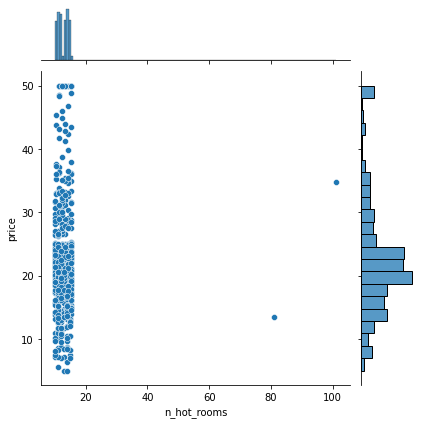

In [60]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

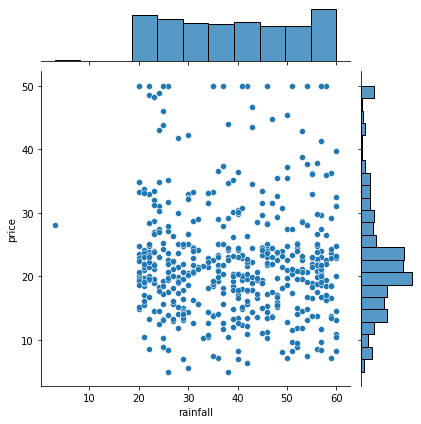

In [61]:
sns.jointplot(x='rainfall', y='price', data=df)

In [62]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


For some data such as 'airport', 'waterbody', etc.. we cannot get detailed description as we got for inter/long/double values.
To overcome that, we manually need to plot their graph and find outliers

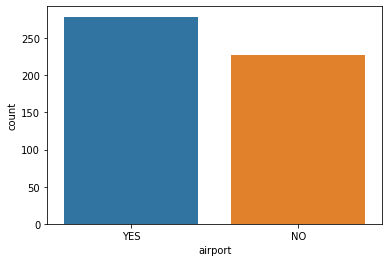

In [63]:
sns.countplot(x='airport', data=df)

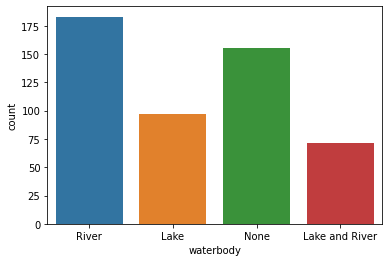

In [64]:
sns.countplot(x='waterbody', data=df)

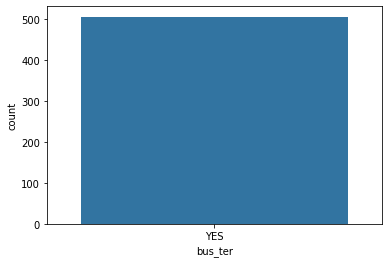

In [65]:
sns.countplot(x='bus_ter', data=df)

Here, bus_ter has no other differentiating attributes. So its of no use

On above code, following were our observations:


1.   Missing values in n_hos_beds
2.   Skewness or outliers in crime rate
3.   Outliers in n_hot_rooms and rainfall
4.   Bus_ter has only Yes value



In [66]:
# .info() gives details about all data whereas 
# .describe() gives details for numerical values only
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [67]:
# fetching 99th percentile value
# on arranging all values in ascending order, the value at 99th % position
np.percentile(df.n_hot_rooms, [99])

array([15.39952])

In [68]:
# added [0] because above statement returned an array of 1 element
np.percentile(df.n_hot_rooms, [99])[0]

15.399519999999999

In [69]:
# uv -> upper value
uv = np.percentile(df.n_hot_rooms, [99])[0]

In [70]:
# fetching values with some condition
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [71]:
# changing all outlier values
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
df[(df.n_hot_rooms > uv)]
# we can see that 101.12 & 81.12 are changed to 46.19856

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [73]:
# fetching 1st percentile value
# on arranging all values in ascending order, the value at 1st % position
np.percentile(df.rainfall, [1])

array([20.])

In [74]:
# added [0] because above statement returned an array of 1 element
np.percentile(df.rainfall, [1])[0]

20.0

In [75]:
# lv -> lower value
lv = np.percentile(df.rainfall, [1])[0]

In [76]:
# fetching values with some condition
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [77]:
# changing all outlier values
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


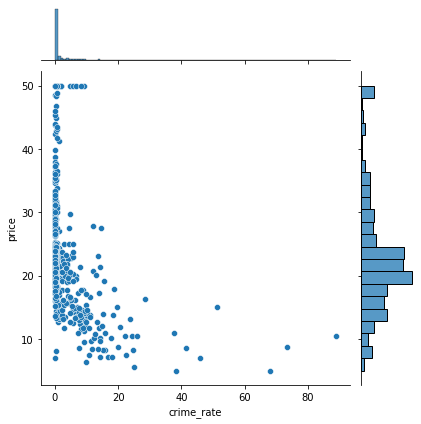

In [79]:
sns.jointplot(x='crime_rate', y='price', data=df)

In [80]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.median())

In [81]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.901336,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464992,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


In [82]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [83]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.901336,12.864050,39.187747,0.054454,3.795104
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464992,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [84]:
del df['dist1']

In [85]:
del df['dist2']

In [86]:
del df['dist3']

In [87]:
del df['dist4']

In [88]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.901336,12.864050,39.187747,0.054454,3.795104
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464992,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [89]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


In [90]:
del df['bus_ter']

In [91]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


In [92]:
# we will generate dummy variables for nominal values i.e. non integral values
# dummy variables = number of categories - 1
df = pd.get_dummies(df)
# this will create dummy variables showing true or false i.e. 0 or 1
# and then as per rule in 2nd line, we might need to delete some variables

In [93]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [94]:
# airport_NO and airport_YES are totally opposite of each other
# Means, if YES than other has to be NO
del df['airport_NO']

In [95]:
# same with waterbody
# with similar logic we can remove waterbody_None variable
del df['waterbody_None']

In [96]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


Values near 1 or -1 has most co-relation and are very important
whereas, values near 0 have least co-relation and thus are least important

In [97]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108513,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.289946,0.455621,0.017561,0.032927,0.059090,0.383235,-0.379673,-0.086805,-0.016894,-0.018150,-0.037123
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005898,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049075,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.031744,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.020748,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.289946,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.007954,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.455621,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.065501,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108513,0.017561,0.005898,-0.049075,0.031744,-0.020748,-0.007954,-0.065501,1.000000,-0.003213,0.057934,-0.070690,-0.028271,-0.005937,0.042775,0.059047,-0.073558
n_hot_rooms,0.017007,0.032927,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003213,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


To remove co-related value
1. find highest value from table - in this case its : 0.915544 for parks & air_qual
2. then check its co-relation with our **dependent variable - in this case its : price**
3. then decide among those 2 who hase less importance : -0.429300 > -0.391574 i.e. air_qual > parks
4. and then delete it : parks

In [98]:
del df['parks']

In [99]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [108]:
import statsmodels.api as sma

In [101]:
model = sma.OLS(df['price'], sma.add_constant(df['room_num'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           1.31e-74
Time:                        11:25:57   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
y = df['price']
x = df[['room_num']]

In [104]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print(lm.intercept_, lm.coef_)

-34.65924312309717 [9.09966966]


In [106]:
lm.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

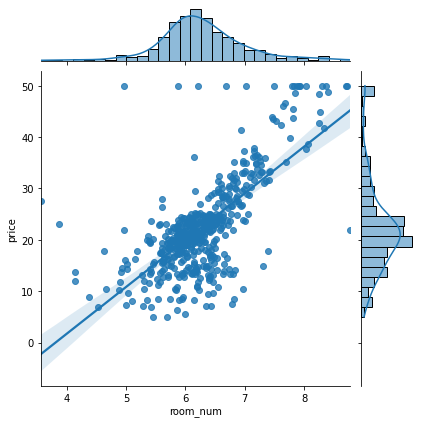

In [109]:
sns.jointplot(x=df['room_num'], y=df['price'], data = df, kind='reg')

In [111]:
x_multi = df.drop("price", axis=1)

In [112]:
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [113]:
y_multi = df['price']

In [114]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [117]:
x_multi_cons = sma.add_constant(x_multi)
x_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [119]:
lm_multi = sma.OLS(y_multi, x_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     85.87
Date:                Tue, 15 Jun 2021   Prob (F-statistic):          1.82e-126
Time:                        11:59:39   Log-Likelihood:                -1513.3
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     490   BIC:                             3126.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.9932      5.171     -1.352      0.177     -17.154       3.168
crime_rate                  -0.0756      0.030     -2.530      0.012      -0.134      -0.017
resid_area                  -0.0385      0.057     -0.678      0.498      -0.150       0.073
air_qual                   -14.7228      3.716     -3.962      0.000     -22.024      -7.422
room_num                     4.1393      0.418      9.895      0.000       3.317       4.961
age                         -0.0083      0.014     -0.618      0.537      -0.035       0.018
teachers                     0.9586      0.118      8.127      0.000       0.727       1.190
poor_prop                   -0.5444      0.052    -10.540      0.000      -0.646      -0.443
n_hos_beds                   0.3473      0.151      2.296      0.022       0.050       0.644
n_hot_rooms                  0.0958      0.082      1.175      0.241      -0.064       0.256
rainfall                     0.0175      0.018      0.986      0.325      -0.017       0.052
avg_dist                    -1.2502      0.188     -6.647      0.000      -1.620      -0.881
airport_YES                  1.0718      0.449      2.384      0.017       0.189       1.955
waterbody_Lake               0.2551      0.638      0.400      0.689      -0.998       1.508
waterbody_Lake and River    -0.7811      0.710     -1.100      0.272      -2.176       0.614
waterbody_River             -0.2884      0.543     -0.531      0.596      -1.355       0.779
==============================================================================
Omnibus:                      200.274   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.307
Skew:                           1.699   Prob(JB):                    4.46e-212
Kurtosis:                       8.884   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
lm_multi_model = LinearRegression()
lm_multi_model.fit(x_multi, y_multi)
print(lm_multi_model.intercept_, lm_multi_model.coef_)

-6.993171296975547 [-7.55578484e-02 -3.85440575e-02 -1.47228496e+01  4.13926395e+00
 -8.34634899e-03  9.58611387e-01 -5.44421532e-01  3.47266994e-01
  9.57788440e-02  1.74700542e-02 -1.25024768e+00  1.07177550e+00
  2.55134328e-01 -7.81086692e-01 -2.88377052e-01]


In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 15) (102, 15) (404,) (102,)


In [123]:
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_test_1 = lm_model.predict(x_test)
y_train_1 = lm_model.predict(x_train)

In [125]:
from sklearn.metrics import r2_score

In [126]:
r2_score(y_test, y_test_1)

0.5550217186330351

In [127]:
r2_score(y_train, y_train_1)

0.7603062497364769

In [128]:
from sklearn import preprocessing

In [129]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [130]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [131]:
from sklearn.linear_model import Ridge

In [132]:
lm_r = Ridge(alpha=0.5)
lm_r.fit(x_train_s, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
r2_score(y_test, lm_r.predict(x_test_s))

0.5549276635503455

In [134]:
from sklearn.model_selection import validation_curve

In [135]:
param_range = np.logspace(-2, 8, 100)

In [136]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [137]:
train_score, test_score = validation_curve(Ridge(), x_train_s, y_train, "alpha", param_range, scoring='r2')

In [140]:
print("------------------------------Train scores------------------------------")
print(train_score)
print("------------------------------Test scores------------------------------")
print(test_score)

------------------------------Train scores------------------------------
[[7.52007981e-01 7.68263599e-01 7.54564155e-01 7.86280422e-01
  7.50645997e-01]
 [7.52007981e-01 7.68263599e-01 7.54564154e-01 7.86280422e-01
  7.50645996e-01]
 [7.52007980e-01 7.68263598e-01 7.54564154e-01 7.86280421e-01
  7.50645996e-01]
 [7.52007979e-01 7.68263597e-01 7.54564153e-01 7.86280420e-01
  7.50645995e-01]
 [7.52007977e-01 7.68263595e-01 7.54564151e-01 7.86280418e-01
  7.50645993e-01]
 [7.52007974e-01 7.68263593e-01 7.54564148e-01 7.86280416e-01
  7.50645990e-01]
 [7.52007969e-01 7.68263588e-01 7.54564144e-01 7.86280412e-01
  7.50645986e-01]
 [7.52007961e-01 7.68263582e-01 7.54564136e-01 7.86280406e-01
  7.50645979e-01]
 [7.52007949e-01 7.68263571e-01 7.54564125e-01 7.86280396e-01
  7.50645968e-01]
 [7.52007929e-01 7.68263554e-01 7.54564107e-01 7.86280380e-01
  7.50645950e-01]
 [7.52007898e-01 7.68263526e-01 7.54564079e-01 7.86280355e-01
  7.50645922e-01]
 [7.52007848e-01 7.68263483e-01 7.54564033e-01 

In [141]:
train_mean = np.mean(train_score, axis=1)

In [142]:
test_mean = np.mean(test_score, axis=1)

In [143]:
train_mean

array([7.62352431e-01, 7.62352430e-01, 7.62352430e-01, 7.62352429e-01,
       7.62352427e-01, 7.62352424e-01, 7.62352420e-01, 7.62352413e-01,
       7.62352402e-01, 7.62352384e-01, 7.62352356e-01, 7.62352311e-01,
       7.62352240e-01, 7.62352127e-01, 7.62351948e-01, 7.62351663e-01,
       7.62351210e-01, 7.62350491e-01, 7.62349351e-01, 7.62347544e-01,
       7.62344687e-01, 7.62340174e-01, 7.62333061e-01, 7.62321878e-01,
       7.62304352e-01, 7.62276992e-01, 7.62234482e-01, 7.62168812e-01,
       7.62068066e-01, 7.61914776e-01, 7.61683774e-01, 7.61339493e-01,
       7.60832727e-01, 7.60096885e-01, 7.59043774e-01, 7.57558848e-01,
       7.55495684e-01, 7.52669391e-01, 7.48848915e-01, 7.43749186e-01,
       7.37025656e-01, 7.28275446e-01, 7.17049864e-01, 7.02881284e-01,
       6.85323192e-01, 6.63997232e-01, 6.38638590e-01, 6.09133246e-01,
       5.75546708e-01, 5.38148470e-01, 4.97434121e-01, 4.54137596e-01,
       4.09216934e-01, 3.63798046e-01, 3.19075287e-01, 2.76187383e-01,
      

In [144]:
max(test_mean)

0.7419673727507645

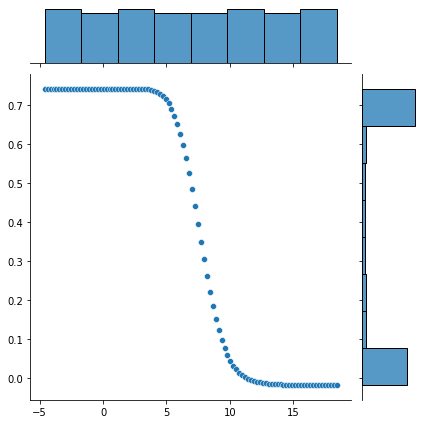

In [145]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [153]:
pos = np.where(test_mean==max(test_mean))
pos

(array([30]),)

In [154]:
param_range[pos[0][0]]

10.722672220103231

In [155]:
lm_r_best = Ridge(alpha=param_range[pos[0][0]])

In [156]:
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=10.722672220103231, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [158]:
r2_score(y_test, lm_r.predict(x_test_s))

0.5549276635503455

In [159]:
r2_score(y_train, lm_r.predict(x_train_s))

0.7603051240956271

In [160]:
from sklearn.linear_model import Lasso

In [161]:
lm_l = Lasso(alpha=0.4)